In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline


from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

# machine learning

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [58]:
import joblib
data=joblib.load("Rating_Review_prediction.xlsx")

In [59]:
data

,Rating,Reviews
0,4.1 out of 5,Very disappointed with the overall performance...
1,4.2 out of 5,"Brilliant camera, huge battery life and brilli..."
2,4.2 out of 5,In my first review given within 24 hrs l found...
3,4.1 out of 5,Received damaged product. really disappointed.
4,4 out of 5,Front camara worrest
...,...,...
2085,4.1 out of 5,It has great sound quality and bass but after ...
2086,3.9 out of 5,Play Video\n Lots of request floating in @ Wha...
2087,4.2 out of 5,"First, I was mainly purchasing these headphone..."
2088,3.8 out of 5,They are really a beast . Vocals are crisp eve...


# Checking the missing value

In [60]:
data.isna().sum()

Rating     0
Reviews    0
dtype: int64

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rating   2090 non-null   object
 1   Reviews  2090 non-null   object
dtypes: object(2)
memory usage: 32.8+ KB


In [62]:
for each_col in data.columns:
    print(each_col)
    print(data[each_col].value_counts())
    print("")

Rating
4.2 out of 5    429
4.1 out of 5    271
4 out of 5      188
3.8 out of 5    183
4.4 out of 5    156
3.9 out of 5    152
4.3 out of 5    130
4.5 out of 5    110
-                79
5 out of 5       76
3.4 out of 5     69
4.6 out of 5     60
3.7 out of 5     51
3.5 out of 5     35
3.6 out of 5     21
3.3 out of 5     20
2.8 out of 5     10
2.5 out of 5     10
1 out of 5       10
4.8 out of 5     10
4.7 out of 5     10
3.1 out of 5     10
Name: Rating, dtype: int64

Reviews
-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [63]:
data.describe()

,Rating,Reviews
count,2090,2090
unique,22,159
top,4.2 out of 5,-
freq,429,95


In [64]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
data.nunique()

Rating      22
Reviews    159
dtype: int64

In [8]:
data['Rating'] = data['Rating'].str.replace('out of 5',' ')

In [9]:
data['Rating'] = data['Rating'].str.replace('-','0')

In [10]:
data['Rating']= data['Rating'].astype(str).astype(float)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rating   2090 non-null   float64
 1   Reviews  2090 non-null   object 
dtypes: float64(1), object(1)
memory usage: 32.8+ KB


In [12]:
data['Rating']= data['Rating'].round()

In [13]:
data

,Rating,Reviews
0,4.0,Very disappointed with the overall performance...
1,4.0,"Brilliant camera, huge battery life and brilli..."
2,4.0,In my first review given within 24 hrs l found...
3,4.0,Received damaged product. really disappointed.
4,4.0,Front camara worrest
...,...,...
2085,4.0,It has great sound quality and bass but after ...
2086,4.0,Play Video\n Lots of request floating in @ Wha...
2087,4.0,"First, I was mainly purchasing these headphone..."
2088,4.0,They are really a beast . Vocals are crisp eve...


In [14]:
data['Rating']= data['Rating'].astype(int)

In [15]:
import re
def  clean_Review(data, Reviews, new_Reviews):
    data[new_Reviews] = data[Reviews].str.lower()
    data[new_Reviews] = data[new_Reviews].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    data[new_Reviews] = data[new_Reviews].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    return data
data_clean = clean_Review(data, 'Reviews', 'new_Reviews')
data_clean.head()

,Rating,Reviews,new_Reviews
0,4,Very disappointed with the overall performance...,very disappointed with the overall performance...
1,4,"Brilliant camera, huge battery life and brilli...",brilliant camera huge battery life and brillia...
2,4,In my first review given within 24 hrs l found...,in my first review given within hrs l found i...
3,4,Received damaged product. really disappointed.,received damaged product really disappointed
4,4,Front camara worrest,front camara worrest


In [16]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_clean['new_Reviews'] = data_clean['new_Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Rating,Reviews,new_Reviews
0,4,Very disappointed with the overall performance...,disappointed overall performance samsung
1,4,"Brilliant camera, huge battery life and brilli...",brilliant camera huge battery life brilliant d...
2,4,In my first review given within 24 hrs l found...,first review given within hrs l found amazing ...
3,4,Received damaged product. really disappointed.,received damaged product really disappointed
4,4,Front camara worrest,front camara worrest


In [17]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(data_clean['new_Reviews'])
x = features

In [18]:
data_clean=data_clean.drop(columns='Reviews',axis=1)

In [19]:
data_clean

,Rating,new_Reviews
0,4,disappointed overall performance samsung
1,4,brilliant camera huge battery life brilliant d...
2,4,first review given within hrs l found amazing ...
3,4,received damaged product really disappointed
4,4,front camara worrest
...,...,...
2085,4,great sound quality bass months use got break ...
2086,4,play video lots request floating watt reviews ...
2087,4,first mainly purchasing headphones wireless ba...
2088,4,really beast vocals crisp even high bass avera...


In [20]:
y=data_clean.iloc[:,0:1]
y.head()

,Rating
0,4
1,4
2,4
3,4
4,4


In [21]:
data_clean.skew()

Rating   -3.266769
dtype: float64

In [22]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
X_power=pt.fit_transform(y)
data_clean=pd.DataFrame(X_power,columns=y.columns)

In [23]:
data_clean.skew()

Rating    0.037475
dtype: float64

# Splitting the dataset

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=56)

In [25]:
y_train.shape,y_test.shape

((1672, 1), (418, 1))

In [26]:
x_train.shape,x_test.shape

((1672, 3338), (418, 3338))

# Building the model

In [27]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))

Training accuracy is 0.993421052631579
Test accuracy is 0.9880382775119617


In [28]:
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

[[ 16   0   0   0   0   0]
 [  0   2   0   0   0   0]
 [  0   0   3   0   0   0]
 [  0   0   0  26   0   0]
 [  0   0   0   0 338   0]
 [  5   0   0   0   0  28]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00       338
           5       1.00      0.85      0.92        33

    accuracy                           0.99       418
   macro avg       0.96      0.97      0.96       418
weighted avg       0.99      0.99      0.99       418



In [29]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.993421052631579
Test accuracy is 0.9880382775119617
[[ 16   0   0   0   0   0]
 [  0   2   0   0   0   0]
 [  0   0   3   0   0   0]
 [  0   0   0  26   0   0]
 [  0   0   0   0 338   0]
 [  5   0   0   0   0  28]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00       338
           5       1.00      0.85      0.92        33

    accuracy                           0.99       418
   macro avg       0.96      0.97      0.96       418
weighted avg       0.99      0.99      0.99       418



In [30]:
# xgboost
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = xgb.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

[11:06:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy is 0.993421052631579
Test accuracy is 0.9880382775119617
[[ 16   0   0   0   0   0]
 [  0   2   0   0   0   0]
 [  0   0   3   0   0   0]
 [  0   0   0  26   0   0]
 [  0   0   0   0 338   0]
 [  5   0   0   0   0  28]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00       338
           5       1.00      0.85      0.92        33

    accuracy                           0.99       418
   macro avg     

In [31]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.8504784688995215
Test accuracy is 0.8229665071770335
[[  0   0   0   0  16   0]
 [  0   2   0   0   0   0]
 [  0   0   3   0   0   0]
 [  0   0   0   1  25   0]
 [  0   0   0   0 338   0]
 [  0   0   0   3  30   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       0.25      0.04      0.07        26
           4       0.83      1.00      0.90       338
           5       0.00      0.00      0.00        33

    accuracy                           0.82       418
   macro avg       0.51      0.51      0.50       418
weighted avg       0.70      0.82      0.75       418



In [32]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9784688995215312
Test accuracy is 0.9784688995215312
[[ 16   0   0   0   0   0]
 [  0   2   0   0   0   0]
 [  0   0   3   0   0   0]
 [  3   0   0  23   0   0]
 [  1   0   0   0 337   0]
 [  5   0   0   0   0  28]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        16
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      0.88      0.94        26
           4       1.00      1.00      1.00       338
           5       1.00      0.85      0.92        33

    accuracy                           0.98       418
   macro avg       0.94      0.96      0.94       418
weighted avg       0.99      0.98      0.98       418



# Cross-Validation

In [39]:
#we will use cross_validation to check whether model is overfitted
from sklearn.model_selection import cross_val_score,GridSearchCV
cross_val_score(DT,x,y,cv=5)

#now i will take the mean of it

cross_val_score(DT,x,y,cv=5).mean()

0.9688995215311005

In [35]:
cross_val_score(xgb,x,y,cv=5)

#now i will take the mean of it

cross_val_score(xgb,x,y,cv=5).mean()

[11:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:09:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:09:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.9641148325358853

In [36]:
cross_val_score(RF,x,y,cv=5)

#now i will take the mean of it

cross_val_score(RF,x,y,cv=5).mean()

0.9688995215311005

In [37]:
cross_val_score(knn,x,y,cv=5)

#now i will take the mean of it

cross_val_score(knn,x,y,cv=5).mean()

0.7100478468899523

# Hyper-parameter Tunning

In [48]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn= KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


In [49]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1,leaf_size=1,p=1)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.993421052631579
Test accuracy is 0.9880382775119617
[[ 16   0   0   0   0   0]
 [  0   2   0   0   0   0]
 [  0   0   3   0   0   0]
 [  0   0   0  26   0   0]
 [  0   0   0   0 338   0]
 [  5   0   0   0   0  28]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00       338
           5       1.00      0.85      0.92        33

    accuracy                           0.99       418
   macro avg       0.96      0.97      0.96       418
weighted avg       0.99      0.99      0.99       418



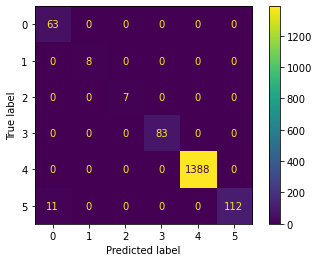

In [55]:
plot_confusion_matrix(knn,x_train, y_train,values_format='d' )

# We have improved our accuracy of the model from 97% to 99% through hyper-parameter tunning

# Saving the model

In [ ]:
import joblib
joblib.dump(knn,"Rating_Prediction.pkl")